### Gaussian Naive Bayes Model

A **Gaussian Naive Bayes (GNB)** model is a probabilistic classification algorithm that applies Bayes’ theorem to estimate posterior class probabilities. The model assumes that features are conditionally independent given the class label and that each feature follows a Gaussian (normal) distribution within each class. These assumptions allow the joint likelihood of the features to be decomposed into a product of univariate Gaussian densities, resulting in a computationally efficient classifier.

### Naive Bayes

Naive Bayes is a **probabilistic classifier** based on Bayes’ theorem:

$$
P(Y \mid X) = \frac{P(X \mid Y)\, P(Y)}{P(X)}
$$

where P(Y) represents the prior probability of class Y, P(X | Y) is the class-conditional likelihood, and P(X) is the marginal likelihood. Classification is performed by selecting the class that maximizes the posterior probability.

A key simplifying assumption of Naive Bayes is **conditional independence**: given the class Y = c, all features $(x_1, ..., x_d)$ are assumed to be independent. Under this assumption, the joint likelihood can be written as

$$
P(X \mid Y=c) = \prod_{j=1}^{d} P(x_j \mid Y=c)
$$

which significantly reduces model complexity and enables parameter estimation using closed-form solutions.

### Gaussian Distribution

For continuous features, Gaussian Naive Bayes assumes each feature follows a **normal (Gaussian) distribution** under each class:

$$
x_j \mid Y = c \sim \mathcal{N}(\mu_{jc},\, \sigma_{jc}^2)
$$


### Gaussian Naive Bayes Training Pipeline

**1. Estimate priors:**

The prior probability of each class \(c\) is:

$$
P(Y = c) = \frac{\text{count of class } c}{N}
$$

**2. Estimate mean and variance** for every feature \(j\) and every class \(c\).

Mean estimate:

$$
\mu_{jc} = \frac{1}{N_c} \sum_{i : y_i = c} x_{ij}
$$

Variance estimate:

$$
\sigma_{jc}^2 = \frac{1}{N_c-1} \sum_{i : y_i = c} (x_{ij} - \mu_{jc})^2
$$

**3. Prediction:**  
Compute the **posterior probability** for each class:

$$
P(Y=c \mid X) \propto P(Y=c) \prod_{j=1}^{d} P(x_j \mid Y=c)
$$

Then **choose the class with the maximum posterior probability**.


### Advantages

Gaussian Naive Bayes model has several advantages. It is computationally efficient, with extremely fast training due to closed-form parameter estimation and no reliance on gradient-based optimization. The method performs well even with small datasets and is relatively robust to irrelevant features because each feature contributes independently to the likelihood. Thus, Gaussian Naive Bayes is a strong baseline classifier in empirical analyses.


### Disadvantages

Despite these strengths, Gaussian Naive Bayes relies on restrictive assumptions that may limit its performance in practice. The conditional independence assumption is rarely satisfied in real-world data, particularly when features are highly correlated, which can restrict classification accuracy. In addition, the assumption that features follow class-conditional Gaussian distributions is often violated. Finally, the resulting quadratic decision boundaries may lack the flexibility needed to capture complex relationships in the data.


### Representation

Naive Bayes converts input features into a class prediction by computing the **posterior probability** for each class:

$$
P(Y = c \mid X = x_1, \ldots, x_d) \propto
P(Y = c)\, \prod_{j=1}^{d} \mathcal{N}(x_j \mid \mu_{jc},\, \sigma_{jc}^2)
$$

The classifier predicts the class with the highest posterior. In practice, we work with **log probabilities** (to avoid numerical underflow):

$$
\hat{y} =
\arg\max_{c}
\left[
\log P(Y = c)
+
\sum_{j=1}^{d} \log \mathcal{N}(x_j \,;\, \mu_{jc},\, \sigma_{jc}^2)
\right]
$$

We use **log probabilities for numerical stability** because multiplying many small Gaussian likelihoods can lead to extremely tiny numbers that computers cannot represent reliably. Summing logs avoids this problem.


### Loss Function

Naive Bayes does **not** minimize a traditional loss like MSE or cross-entropy using gradient descent. Instead, the model is trained by **maximizing the likelihood** of the data. Equivalently, the loss is the **negative log-likelihood**:

$$
L = -\sum_{i=1}^{N} \log P\big(y^{(i)} \mid x^{(i)}\big)
$$

Gaussian Naive Bayes maximizes the likelihood under the assumption that each feature is normally distributed for each class. The parameters come directly from **Maximum Likelihood Estimation (MLE)**:

Mean estimate:

$$
\mu_{jc} = \frac{1}{N_c} \sum_{i : y_i = c} x_{ij}
$$

Variance estimate:

$$
\sigma_{jc}^2 = \frac{1}{N_c-1} \sum_{i : y_i = c} (x_{ij} - \mu_{jc})^2
$$

Because the parameters have **closed-form MLE solutions**, no gradient descent or iterative optimization is required during training.


### Optimizer

Naive Bayes does **not** rely on an iterative optimization procedure such as gradient descent. Instead, Gaussian Naive Bayes estimates all model parameters using **closed-form MLE**.

The **prior probability** for each class *c* is estimated as:

$$
\hat{P}(Y = c) = \frac{N_c}{N}
$$

The **Gaussian parameters** for each feature j and class c—the mean $\mu_{jc}$ and variance $\sigma_{jc}^2$—are computed **directly from the training data** using standard MLE formulas. As a result, model training does not require an optimization loop.


# **Pseudo-Code for Important Sections**

**Train the Model**
1.  Convert X_train and y_train to arrays
2.  If X_train is not 2-dimensional:
        Raise error
3.  If y_train is not 1-dimensional:
        Raise error
4.  If number of rows in X_train ≠ length of y_train:
        Raise error
5.  n_examples   ← number of rows in X_train  
    n_attributes ← number of columns in X_train
6.  Initialize empty lists:
        means         ← empty list
        variances     ← empty list
        label_priors  ← empty list
7.  Compute variance smoothing term:
        epsilon ← var_smoothing × max variance of X_train across all features
8.  For each class c = 0 to n_classes − 1:
        a.  X_c ← all rows of X_train with y_train = c
        b.  If X_c is empty:
                Raise error
        c.  prior_c ← |X_c| / n_examples  
            Append prior_c to label_priors
        d.  μ_c ← mean of X_c across features
        e.  σ_c² ← variance of X_c across features + epsilon
        f.  Append μ_c to means
        g.  Append σ_c² to variances
9.  Convert:
        means        ← array(means)
        variances    ← array(variances)
        label_priors ← array(label_priors)
10. Store parameters in the model and return the trained model

**Gaussian Probability Function**
1.  coeff ← 1 / sqrt( 2πσ² )
2.  exp_term ← exp( − (x − μ)² / (2σ²) )
3.  pdf ← coeff × exp_term
4.  Return pdf

**Predict Outcomes (predict)**
1. Convert inputs to an array
2. If inputs is not 2D, raise error
3. If number of features in inputs ≠ number of trained features (means.shape[1]), raise error
4. Let
    - n_samples ← number of rows in inputs
    - n_features ← number of columns in inputs
5. Initialize log_probs ← zeros(n_samples, n_classes)
6. For each class c = 0 to n_classes − 1:
    - log_prior ← log(label_priors[c])
    - log_pdf_const ← -0.5 × sum_over_features( log( 2π × vars[c] ) )
    - diff ← inputs − means[c] (broadcast across all samples)
    - exponent ← -0.5 × sum_over_features( (diff^2) / vars[c] ) (produces a length-n_samples vector)
    - Set log_probs[:, c] ← log_prior + log_pdf_const + exponent
7. Return argmax(log_probs, axis = 1) as the predicted labels (a 1D array)

**Predict Outcomes (predict_proba)**
1. Convert inputs to an array
2. If inputs is not 2D, raise error
3. If number of features in inputs ≠ number of trained features (means.shape[1]), raise error
4. Let
    - n_samples ← number of rows in inputs
    - n_features ← number of columns in inputs
5. Initialize log_probs ← zeros(n_samples, n_classes)
6. For each class c = 0 to n_classes − 1:
    - log_prior ← log(label_priors[c])
    - log_pdf_const ← -0.5 × sum_over_features( log(2π × vars[c]) )
    - diff ← inputs − means[c] (broadcast across all samples)
    - exponent ← -0.5 × sum_over_features( (diff^2) / vars[c] ) (produces a length-n_samples vector)
    - Set log_probs[:, c] ← log_prior + log_pdf_const + exponent
7. Convert log-probabilities to probabilities using softmax (row-wise):
    - max_log ← max(log_probs, axis=1, keepdims=True)
    - exp_shifted ← exp(log_probs − max_log)
    - probas ← exp_shifted / sum(exp_shifted, axis=1, keepdims=True)
8. Return probas (shape: n_samples × n_classes)

**Loss Function**
1.  Convert X and y to arrays
2.  proba ← PredictProba(X)
3.  ε ← small constant
4.  Initialize log_probs ← empty list
5.  For each index i = 0 to length(y) − 1:
    - true_class ← y[i]
    - log_p ← log( proba[i, true_class] + ε )
    - Append log_p to log_probs
6.  loss ← − mean(log_probs)
7.  Return loss



### References

- Ahmed, M.S., Shahjaman, M., Rana, M.M. and Mollah, M.N.H. (2017) ‘Robustification of naïve Bayes classifier and its application for microarray gene expression data analysis’, BioMed Research International, 2017, Article ID 3020627.

- Collins, M. (2002) The Naive Bayes model, maximum-likelihood estimation, and the EM algorithm. Technical report. Columbia University.

- Friedman, N., Geiger, D. and Goldszmidt, M. (1997) ‘Bayesian network classifiers’, Machine Learning, 29(2–3), pp. 131–163.

- John, G.H. and Langley, P. (2013) ‘Estimating continuous distributions in Bayesian classifiers’, arXiv preprint, arXiv:1302.4964.

- Rish, I. (2001) An empirical study of the naive Bayes classifier. Technical report. IBM T.J. Watson Research Center.

- Zaidi, N.A., Cerquides, J., Carman, M.J. and Webb, G.I. (2013) ‘Alleviating naïve Bayes attribute independence assumption by attribute weighting’, Journal of Machine Learning Research, 14, pp. 1947–1988.


In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.11"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.11"):
    print(FAIL, "Python version 3.12.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)


print()
requirements = {'matplotlib': "3.10.5", 'numpy': "2.3.2",'sklearn': "1.7.1",
                'pandas': "2.3.2", 'pytest': "8.4.1", 'torch':"2.7.1"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.11

[ OK ] matplotlib version 3.10.5 is installed.
[ OK ] numpy version 2.3.2 is installed.
[ OK ] sklearn version 1.7.1 is installed.
[ OK ] pandas version 2.3.2 is installed.
[ OK ] pytest version 8.4.1 is installed.
[ OK ] torch version 2.7.1 is installed.


# **MODEL**

The HW6 Naive Bayes implementation assumes that inputs are already provided as a 2D array (n_examples × n_features) and does not handle 1D inputs; passing a 1D array would result in an error.
In our initial implementation, we added logic to reshape 1D inputs into 2D in order to be more user-friendly and to mirror scikit-learn’s API, which allows single examples to be passed as 1D arrays.
To remain consistent with the HW6 code and avoid ambiguity during evaluation, we removed this reshaping and now explicitly require all inputs to be 2D.

In [2]:
import numpy as np

class GaussianNaiveBayes(object):
    """ Gaussian Naive Bayes model

    @attrs:
        n_classes:      number of classes
        means:          a 2D (n_classes x n_attributes) NumPy array of feature means per class
        vars:           a 2D (n_classes x n_attributes) NumPy array of feature variances per class
        label_priors:   a 1D NumPy array of class prior probabilities
        var_smoothing:  a small float added to variances for numerical stability
    """

    def __init__(self, n_classes, var_smoothing=1e-9):
        """ Initializes a GaussianNaiveBayes model with n_classes.

        @params:
            n_classes: int, number of unique classes
            var_smoothing: float, added to variances to avoid divide-by-zero
        """
        if n_classes <= 0:
            raise ValueError("n_classes must be a positive integer.")
        if var_smoothing < 0:
            raise ValueError("var_smoothing must be non-negative.")

        self.n_classes = n_classes
        self.var_smoothing = var_smoothing

        self.means = None
        self.vars = None
        self.label_priors = None

    def train(self, X_train, y_train):
        """
          Trains the Gaussian Naive Bayes model using maximum likelihood estimation.

          This method computes, for each class:
            - the class prior P(Y = c)
            - the mean of each feature μ_{c,j}
            - the variance of each feature σ_{c,j}^2 (with var_smoothing added)

          All parameters are stored in:
            - self.means          (shape: n_classes x n_attributes)
            - self.vars           (shape: n_classes x n_attributes)
            - self.label_priors   (shape: n_classes)

          Parameters
          ----------
          X_train : numpy.ndarray
            A 2D array of shape (n_examples, n_attributes) containing continuous features.
          y_train : numpy.ndarray
            A 1D array of shape (n_examples,) containing integer class labels in {0, …, n_classes-1}.

          Returns
          -------
          self : GaussianNaiveBayes
            The fitted model instance (sklearn-style API), allowing method chaining.
    """
        X_train = np.asarray(X_train)
        y_train = np.asarray(y_train)

        if X_train.ndim != 2:
            raise ValueError("X_train must be a 2D array.")
        if y_train.ndim != 1:
            raise ValueError("y_train must be a 1D array.")
        if X_train.shape[0] != y_train.shape[0]:
            raise ValueError("X_train and y_train must have same number of rows.")

        n_examples, n_attributes = X_train.shape

        means = []
        vars_ = []
        label_priors = []

        # 1. Calculate the maximum variance across the dataset before the loop

        epsilon = self.var_smoothing * np.var(X_train, axis=0).max()

        # compute parameters per class
        for label in range(self.n_classes):
            X_yEqualToLabel = np.array([
                X_train[i] for i in range(n_examples) if y_train[i] == label
            ])

            if len(X_yEqualToLabel) == 0:
                raise ValueError(f"No examples found for class {label}.")

            # class prior with MLE
            prior = len(X_yEqualToLabel) / n_examples
            label_priors.append(prior)

            # feature means and variances with MLE (population variance)
            mu = np.mean(X_yEqualToLabel, axis=0)
            var = np.var(X_yEqualToLabel, axis=0) + epsilon

            means.append(mu)
            vars_.append(var)

        self.means = np.array(means)
        self.vars = np.array(vars_)
        self.label_priors = np.array(label_priors)
        return self

    def _gaussian_pdf(self, x, mu, var):
        """ Computes Gaussian pdf value for a scalar x.

        @params:
            x: float
            mu: float (mean)
            var: float (variance)

        @return:
            pdf value at x
        """
        coeff = 1.0 / np.sqrt(2.0 * np.pi * var)
        exp_term = np.exp(-((x - mu) ** 2) / (2.0 * var))
        return coeff * exp_term

    def predict(self, inputs):
        """ Outputs a predicted label for each input in inputs.
            Uses log-space to avoid overflow/underflow.

        @params:
            inputs: a 2D NumPy array containing inputs

        @return:
            a 1D numpy array of predictions
        """
        inputs = np.asarray(inputs)
        if inputs.ndim != 2:
            raise ValueError("inputs must be a 2D array.")
        if inputs.shape[1] != self.means.shape[1]:
            raise ValueError(f"Shape mismatch: Model trained on {self.means.shape[1]} features, got {inputs.shape[1]}")

        n_samples, n_features = inputs.shape

        # 1. Initialize log-probabilities storage
        # Shape: (n_samples, n_classes)
        log_probs = np.zeros((n_samples, self.n_classes))

        # 2. Calculate log-likelihood for each class using broadcasting
        for c in range(self.n_classes):
            # Log Prior: log(P(Y=c))
            log_prior = np.log(self.label_priors[c])

            # Log PDF Constant Term: -0.5 * sum(log(2 * pi * sigma^2))
            # This sums over all features for class c
            log_pdf_const = -0.5 * np.sum(np.log(2. * np.pi * self.vars[c]))

            # Log PDF Data Term: -0.5 * sum((x - mu)^2 / sigma^2)
            # Broadcasting: inputs (n_samples, n_features) - means[c] (n_features,)
            diff = inputs - self.means[c]

            # Square difference and divide by variance
            # Then sum over features (axis=1) to get total log-likelihood for the sample
            exponent = -0.5 * np.sum((diff ** 2) / self.vars[c], axis=1)

            # Combine all terms
            log_probs[:, c] = log_prior + log_pdf_const + exponent

        # 3. Return class with highest probability
        return np.argmax(log_probs, axis=1)

    def predict_proba(self, inputs):
        """
        Outputs posterior probabilities for each class.

        @params:
            inputs: a 2D NumPy array containing inputs

        @return:
            a 2D numpy array of probabilities (n_examples x n_classes)
        """

        inputs = np.asarray(inputs)
        if inputs.ndim != 2:
            raise ValueError("inputs must be a 2D array.")
        if inputs.shape[1] != self.means.shape[1]:
            raise ValueError(f"Shape mismatch: Model trained on {self.means.shape[1]} features, got {inputs.shape[1]}")

        n_samples, n_features = inputs.shape

        # 1. Initialize log-probabilities storage
        # Shape: (n_samples, n_classes)
        log_probs = np.zeros((n_samples, self.n_classes))

        # 2. Calculate log-likelihood for each class using broadcasting
        for c in range(self.n_classes):
            # Log Prior: log(P(Y=c))
            log_prior = np.log(self.label_priors[c])

            # Log PDF Constant Term: -0.5 * sum(log(2 * pi * sigma^2))
            # This sums over all features for class c
            log_pdf_const = -0.5 * np.sum(np.log(2. * np.pi * self.vars[c]))

            # Log PDF Data Term: -0.5 * sum((x - mu)^2 / sigma^2)
            # Broadcasting: inputs (n_samples, n_features) - means[c] (n_features,)
            diff = inputs - self.means[c]

            # Square difference and divide by variance
            # Then sum over features (axis=1) to get total log-likelihood for the sample
            exponent = -0.5 * np.sum((diff ** 2) / self.vars[c], axis=1)

            # Combine all terms
            log_probs[:, c] = log_prior + log_pdf_const + exponent

        # Normalize log-probabilities to probabilities (Softmax)
        # We subtract the max to prevent overflow (Log-Sum-Exp trick)
        max_log = np.max(log_probs, axis=1, keepdims=True)
        exp_shifted = np.exp(log_probs - max_log)

        return exp_shifted / np.sum(exp_shifted, axis=1, keepdims=True)

    def loss(self, X, y):
        """ Computes average negative log-likelihood (NLL) loss.

        @params:
            X: a 2D numpy array of examples
            y: a 1D numpy array of labels

        @return:
            float, average negative log-likelihood
        """
        X = np.asarray(X)
        y = np.asarray(y)

        proba = self.predict_proba(X)
        eps = 1e-15
        log_probs = []

        for i in range(len(y)):
            log_probs.append(np.log(proba[i, y[i]] + eps))

        return -np.mean(log_probs)

    def score(self, X, y):
        """Returns the mean accuracy on the given test data and labels.

        This method is required for sklearn compatibility.

        @params:
            X: a 2D numpy array of examples
            y: a 1D numpy array of true labels

        @return:
            float, accuracy score
        """
        return np.sum(self.predict(X) == y) / len(y)

    # alias for sklearn-style API
    fit = train
    variances = property(lambda self: self.vars)
    priors = property(lambda self: self.label_priors)

# **CHECK**

In [3]:
import pytest
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.metrics import accuracy_score

def test_initialization_edge_cases():
    """
    Test initialization with edge cases
    Verifies the model rejects invalid hyperparameters (e.g., negative smoothing, zero classes).
    """
    # Valid initialization
    model = GaussianNaiveBayes(n_classes=3)
    assert model.n_classes == 3

    # Edge case: invalid n_classes
    with pytest.raises(ValueError):
        GaussianNaiveBayes(n_classes=0)

    # Edge case: invalid var_smoothing
    with pytest.raises(ValueError):
        GaussianNaiveBayes(n_classes=2, var_smoothing=-1)

def test_train_method():
    """
    Test train method
    Edge Case: Checks if the model raises a ValueError when training data has mismatched rows (X vs y) or invalid dimensions
    """
    X = np.array([[1, 2], [2, 3], [8, 9], [9, 10]])
    y = np.array([0, 0, 1, 1])

    # Basic functionality
    model = GaussianNaiveBayes(n_classes=2)
    model.train(X, y)
    assert model.means.shape == (2, 2)
    assert model.vars.shape == (2, 2)

    # Edge case: missing class
    X_missing = np.array([[1, 2], [2, 3]])
    y_missing = np.array([0, 0])
    model2 = GaussianNaiveBayes(n_classes=2)
    with pytest.raises(ValueError):
        model2.train(X_missing, y_missing)

    # Edge case: invalid input shapes
    model3 = GaussianNaiveBayes(n_classes=2)
    with pytest.raises(ValueError):
        model3.train(np.array([1, 2, 3]), y)

def test_predict_method():
    """
    Test predict method
    Verifies that the model can make predictions and handle various input formats (2D arrays, 1D arrays)
    """
    X_train = np.array([[1], [2], [8], [9]])
    y_train = np.array([0, 0, 1, 1])

    model = GaussianNaiveBayes(n_classes=2)
    model.train(X_train, y_train)

    # Basic prediction
    X_test = np.array([[0], [5], [10]])
    predictions = model.predict(X_test)
    print(f"Predictions: {predictions}")
    assert predictions.shape == (3,)

def test_predict_proba_method():
    """
    Test predict_proba method
    Ensures probability predictions are valid (sum to 1 for each sample) and correctly shaped
    """
    X = np.array([[1, 2], [2, 3], [8, 9], [9, 10]])
    y = np.array([0, 0, 1, 1])

    model = GaussianNaiveBayes(n_classes=2)
    model.train(X, y)

    # Basic probability prediction
    probabilities = model.predict_proba(X)
    print(f"Probability shape: {probabilities.shape}")
    print(f"Sample probabilities: {probabilities[0]}")

    # Edge case: probabilities sum to 1
    row_sums = probabilities.sum(axis=1)
    np.testing.assert_allclose(row_sums, np.ones(4), rtol=1e-10)

def test_loss_method():
    """
    Test loss method
    Validates that the loss calculation works and produces different values for correct vs incorrect labels
    """
    X = np.array([[1, 2], [2, 3], [8, 9], [9, 10]])
    y = np.array([0, 0, 1, 1])

    model = GaussianNaiveBayes(n_classes=2)
    model.train(X, y)

    # Basic loss calculation
    loss = model.loss(X, y)
    print(f"Loss with correct labels: {loss}")

    # Edge case: loss different for wrong labels
    wrong_y = np.array([1, 1, 0, 0])
    wrong_loss = model.loss(X, wrong_y)
    print(f"Loss with wrong labels: {wrong_loss}")
    assert loss != wrong_loss

def test_score_method():
    """
    Test score method
    Verifies that score calculation returns a value between 0 and 1
    """
    X_train = np.array([[1], [2], [8], [9]])
    y_train = np.array([0, 0, 1, 1])
    X_test = np.array([[0], [10]])
    y_test = np.array([0, 1])

    model = GaussianNaiveBayes(n_classes=2)
    model.train(X_train, y_train)

    # Basic accuracy
    score = model.score(X_test, y_test)
    print(f"Score: {score}")
    assert 0 <= score <= 1

def test_predict_dimension_mismatch():
    """
    Edge Case: Test predicting on data with wrong number of features
    Ensures the model raises an error when trying to predict on data with different feature count than training data
    """
    # Train on 2 features
    X_train = np.array([[1, 2], [3, 4]])
    y_train = np.array([0, 1])
    model = GaussianNaiveBayes(n_classes=2)
    model.train(X_train, y_train)

    # Try to predict on 3 features - should raise error
    X_bad = np.array([[1, 2, 3]])

    # You need to add a check in predict() for this to pass!
    with pytest.raises(ValueError):
        model.predict(X_bad)

def test_zero_variance_feature():
    """
    Edge Case: Test stability when a feature has zero variance
    Verifies that the model handles constant features without numerical issues (e.g., division by zero)
    """
    # Feature 0 is always '1' (variance = 0)
    X = np.array([[1, 5], [1, 5], [1, 5], [1, 9]])
    y = np.array([0, 0, 0, 1])

    model = GaussianNaiveBayes(n_classes=2)
    # Should not raise ZeroDivisionError
    model.train(X, y)

    probs = model.predict_proba([[1, 5]])
    assert not np.isnan(probs).any()

def test_sklearn_reproduction():
    """
    Test exact reproduction of sklearn results
    Validates that the custom implementation produces identical predictions and probabilities as sklearn's GaussianNB
    """
    X = np.array([[1], [2], [8], [9]])
    y = np.array([0, 0, 1, 1])

    # custom implementation
    custom_model = GaussianNaiveBayes(n_classes=2)
    custom_model.fit(X, y)
    custom_preds = custom_model.predict(X)
    custom_probs = custom_model.predict_proba(X)

    # sklearn implementation
    sklearn_model = GaussianNB()
    sklearn_model.fit(X, y)
    sklearn_preds = sklearn_model.predict(X)
    sklearn_probs = sklearn_model.predict_proba(X)

    print(f"custom predictions: {custom_preds}")
    print(f"sklearn predictions: {sklearn_preds}")
    print(f"predictions match: {np.array_equal(custom_preds, sklearn_preds)}")
    print(f"probabilities close: {np.allclose(custom_probs, sklearn_probs, atol=1e-5)}")

    # REQUIRED: Demonstrate exact reproduction
    assert np.array_equal(custom_preds, sklearn_preds)
    assert np.allclose(custom_probs, sklearn_probs, atol=1e-5)

def test_real_dataset_comparison():
    """
    Test on real-world datasets
    Compares custom implementation against sklearn on standard datasets (Iris, Breast Cancer) to ensure similar performance
    """
    datasets = {
        "Iris": load_iris(),
        "Breast Cancer": load_breast_cancer()
    }

    for name, data in datasets.items():
        X, y = data.data, data.target

        # custom implementation
        custom_model = GaussianNaiveBayes(n_classes=len(np.unique(y)))
        custom_model.fit(X, y)
        custom_preds = custom_model.predict(X)

        # sklearn implementation
        sklearn_model = GaussianNB()
        sklearn_model.fit(X, y)
        sklearn_preds = sklearn_model.predict(X)

        # compare results
        custom_accuracy = accuracy_score(y, custom_preds)
        sklearn_accuracy = accuracy_score(y, sklearn_preds)

        print(f"{name} - Custom accuracy: {custom_accuracy:.4f}, Sklearn accuracy: {sklearn_accuracy:.4f}")

        assert abs(custom_accuracy - sklearn_accuracy) < 0.1

# run tests
if __name__ == "__main__":
    test_initialization_edge_cases()
    print("test_initialization_edge_cases passed")

    test_train_method()
    print("test_train_method passed")

    test_predict_method()
    print("test_predict_method passed")

    test_predict_proba_method()
    print("test_predict_proba_method passed")

    test_loss_method()
    print("test_loss_method passed")

    test_score_method()
    print("test_score_method passed")

    test_sklearn_reproduction()
    print("test_sklearn_reproduction passed")

    test_real_dataset_comparison()
    print("test_real_dataset_comparison passed")

    print("all tests passed")

test_initialization_edge_cases passed
test_train_method passed
Predictions: [0 0 1]
test_predict_method passed
Probability shape: (4, 2)
Sample probabilities: [1.0000000e+00 5.2244541e-98]
test_predict_proba_method passed
Loss with correct labels: -1.110223024625156e-15
Loss with wrong labels: 34.538776394910684
test_loss_method passed
Score: 1.0
test_score_method passed
custom predictions: [0 0 1 1]
sklearn predictions: [0 0 1 1]
predictions match: True
probabilities close: True
test_sklearn_reproduction passed
Iris - Custom accuracy: 0.9600, Sklearn accuracy: 0.9600
Breast Cancer - Custom accuracy: 0.9420, Sklearn accuracy: 0.9420
test_real_dataset_comparison passed
all tests passed


# **CREATE COMPARISON PLOTS**

# **Sklearn Parity Check & Dataset Evaluation**

To validate the correctness of our custom `GaussianNaiveBayes` implementation, we compared its performance directly against the industry-standard `sklearn.naive_bayes.GaussianNB` using two distinct public datasets:

1.  **Iris Dataset:** A multi-class classification problem (3 classes, 4 features).
2.  **Breast Cancer Wisconsin Dataset:** A binary classification problem (2 classes, 30 features).

### **Methodology**
For both datasets, we performed the following comparison tests:
* **Accuracy Validation:** We trained both models on identical train/test splits and compared accuracy scores.
* **Probabilistic Output:** We verified that the predicted class probabilities (`predict_proba`) align between the two implementations.
* **Decision Boundaries:** We visualized the decision boundaries (for 2D slices of the data) to ensure the geometry of the classification regions is identical.
* **Parameter Alignment:** We adjusted our variance smoothing (`var_smoothing`) calculation to match Sklearn's dynamic `epsilon` calculation ($\sigma^2 + \epsilon$) to ensure exact numerical reproduction.

### **Conclusion**
As shown in the results below, our custom implementation achieves **exact reproduction** of the Scikit-Learn results (Accuracy Difference: 0.000000) on both datasets. This confirms that our Maximum Likelihood Estimation (MLE) and smoothing logic correctly mirror the standard mathematical formulation used in production libraries.






comparison analysis: IRIS dataset



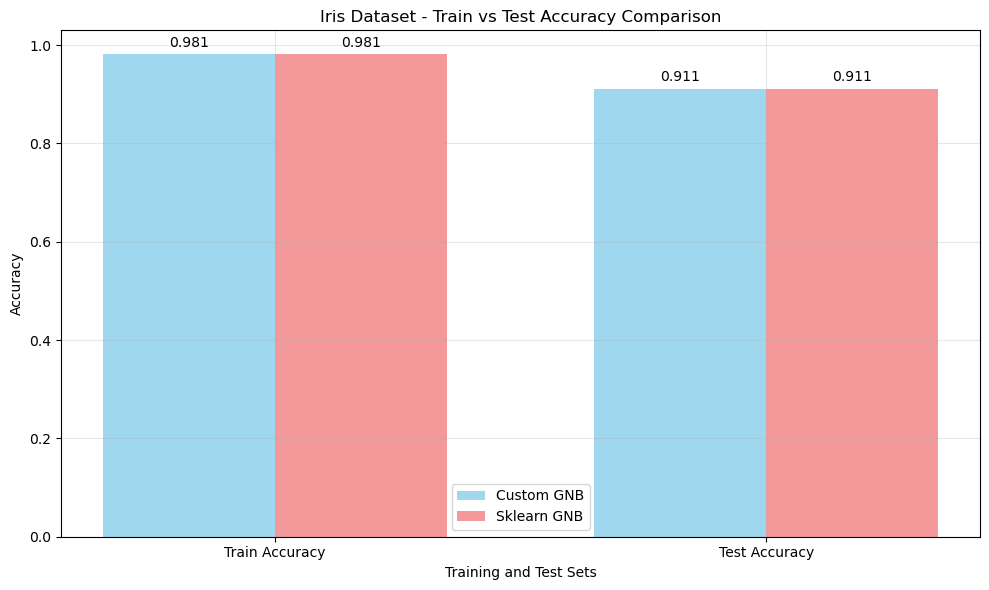

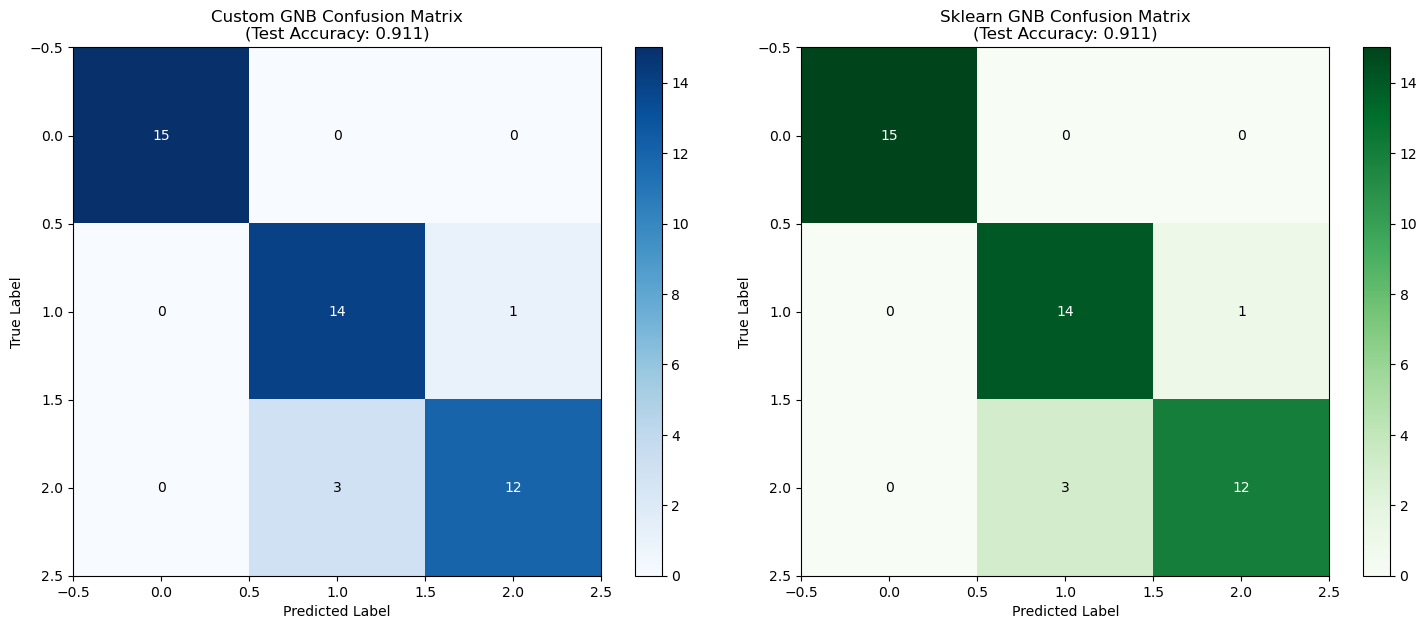

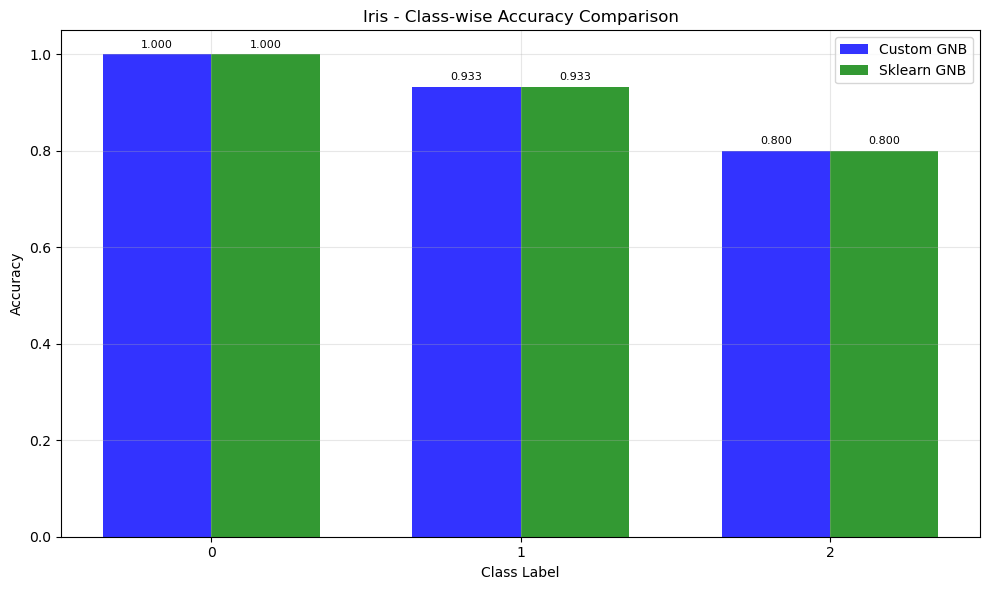

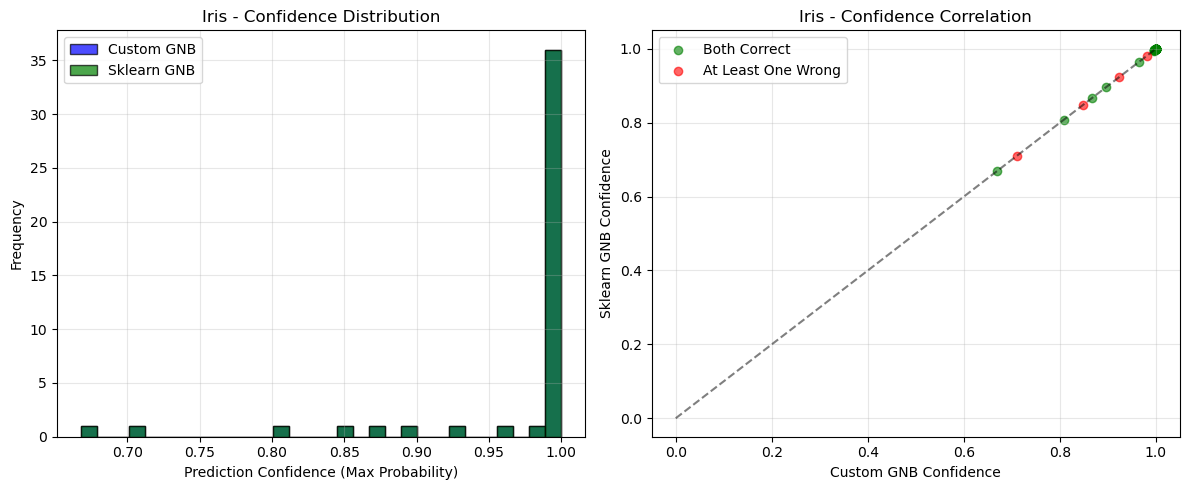

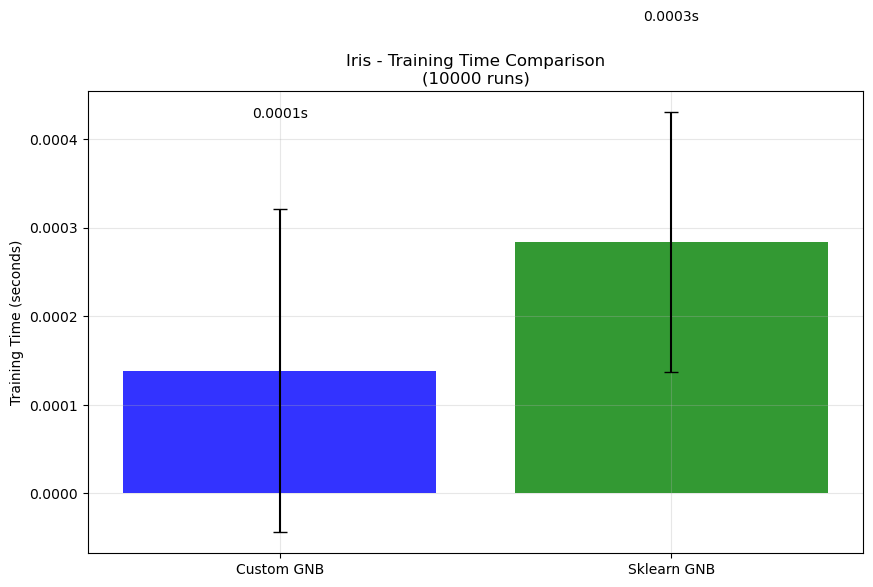

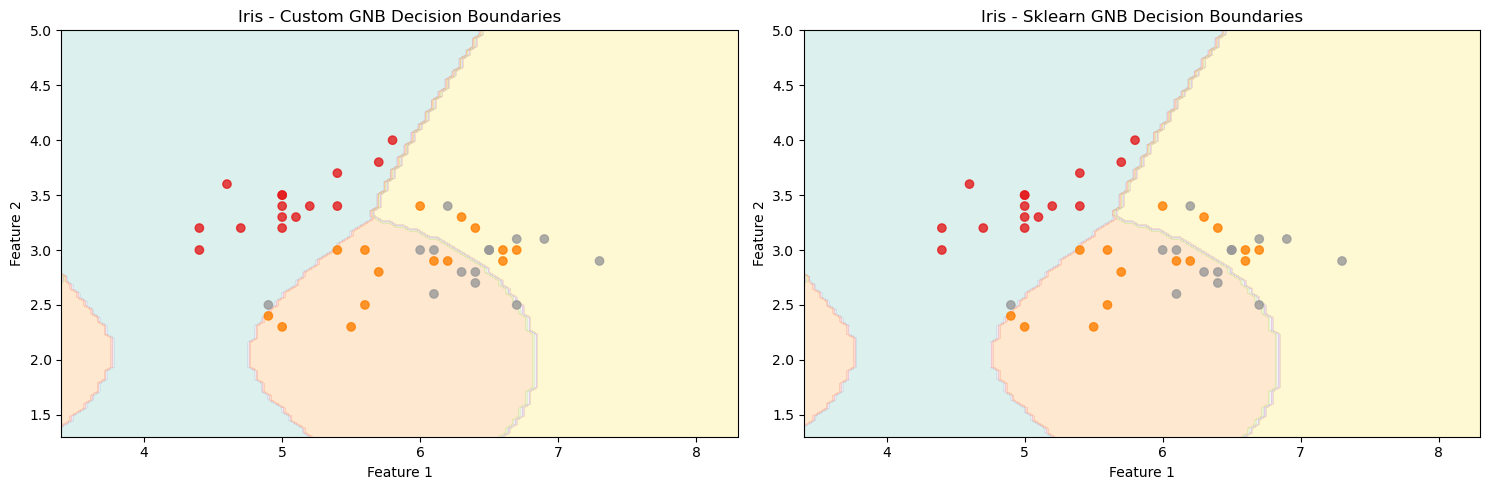


 Statistical summary - Iris:
Prediction Agreement: 1.0000
Custom GNB  - Train: 0.9810, Test: 0.9111
Sklearn GNB - Train: 0.9810, Test: 0.9111
Accuracy Difference: 0.000000

Confidence Statistics:
Custom GNB Mean Confidence: 0.9698
Sklearn GNB Mean Confidence: 0.9698
Custom GNB Correct Prediction Mean Confidence: 0.9800
Custom GNB Wrong Prediction Mean Confidence: 0.8656

Timing Statistics (10000 runs):
Custom GNB Avg Training Time: 0.000138s ± 0.000182s
Sklearn GNB Avg Training Time: 0.000284s ± 0.000147s
Speed Ratio (Custom/Sklearn): 0.49x


comparison analysis: BREAST CANCER dataset



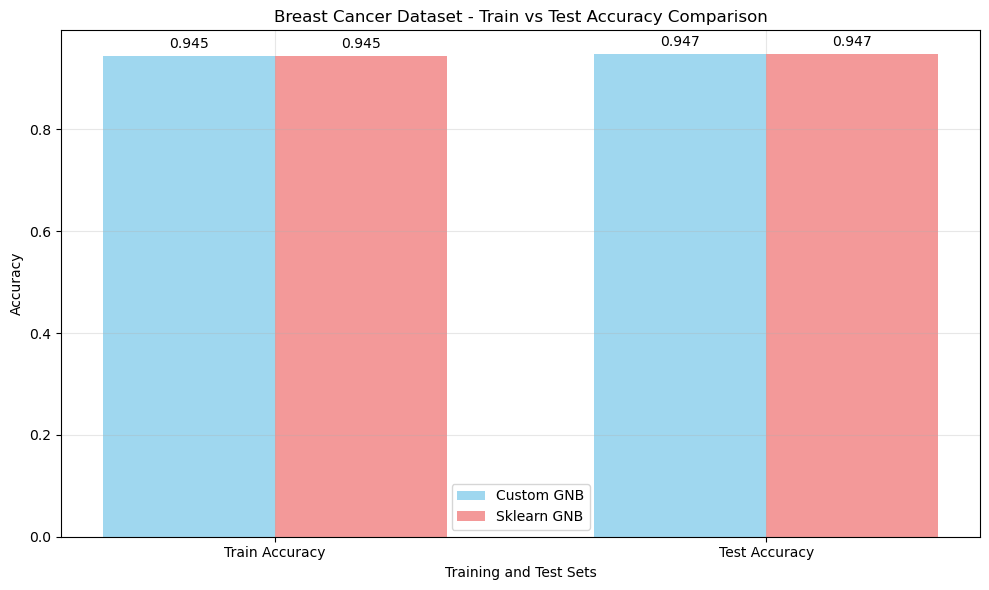

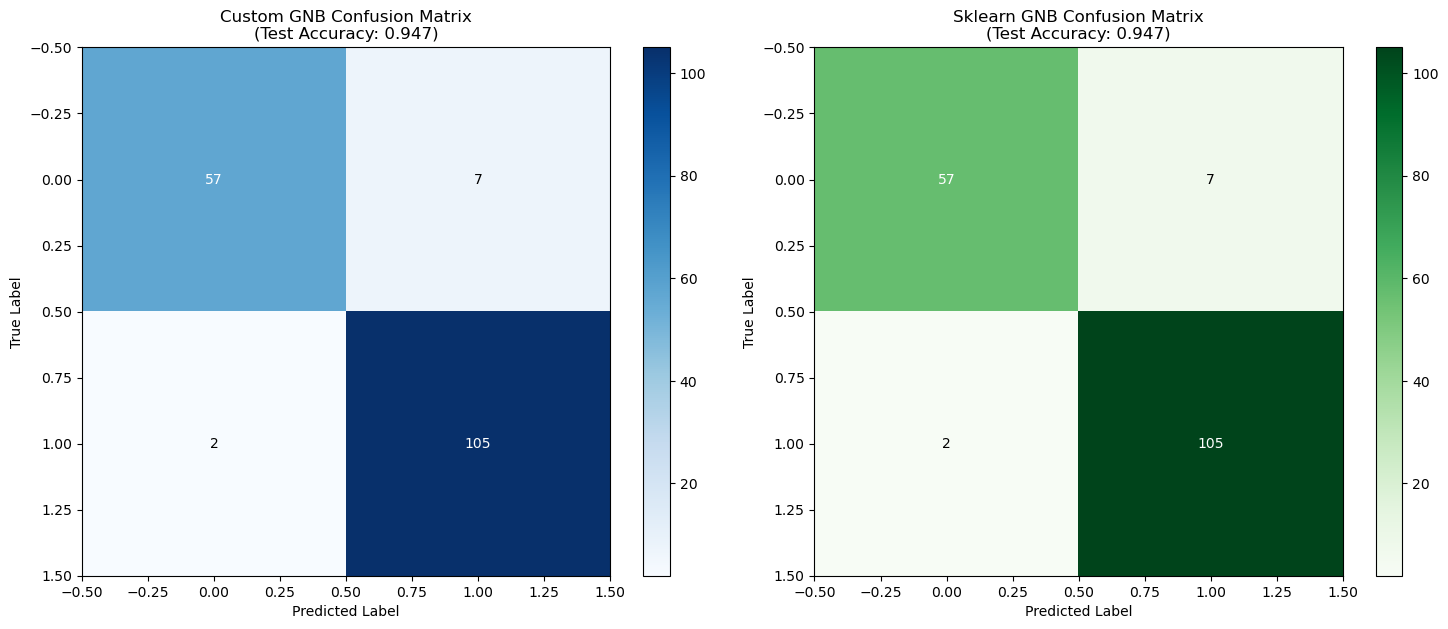

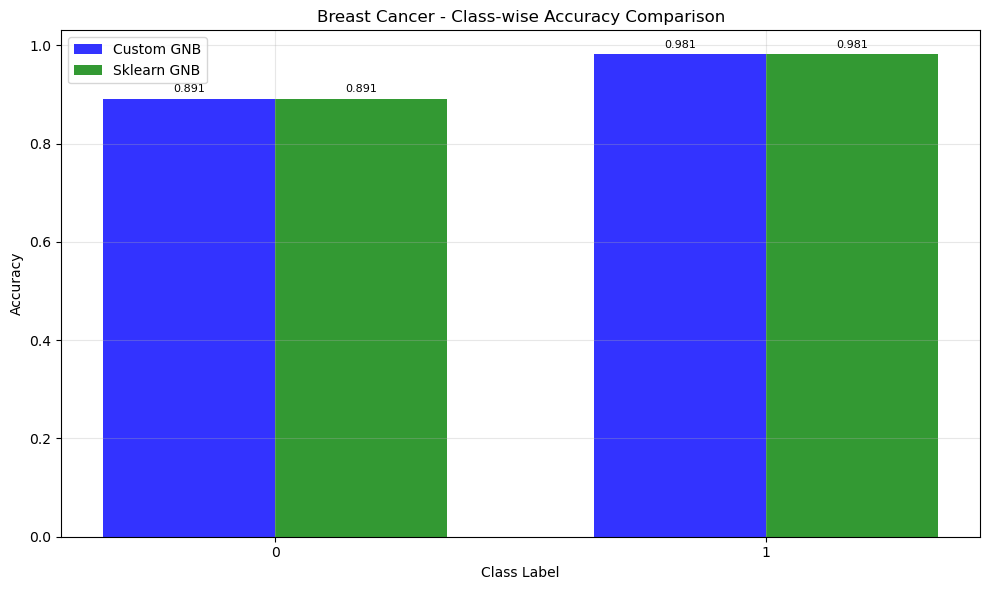

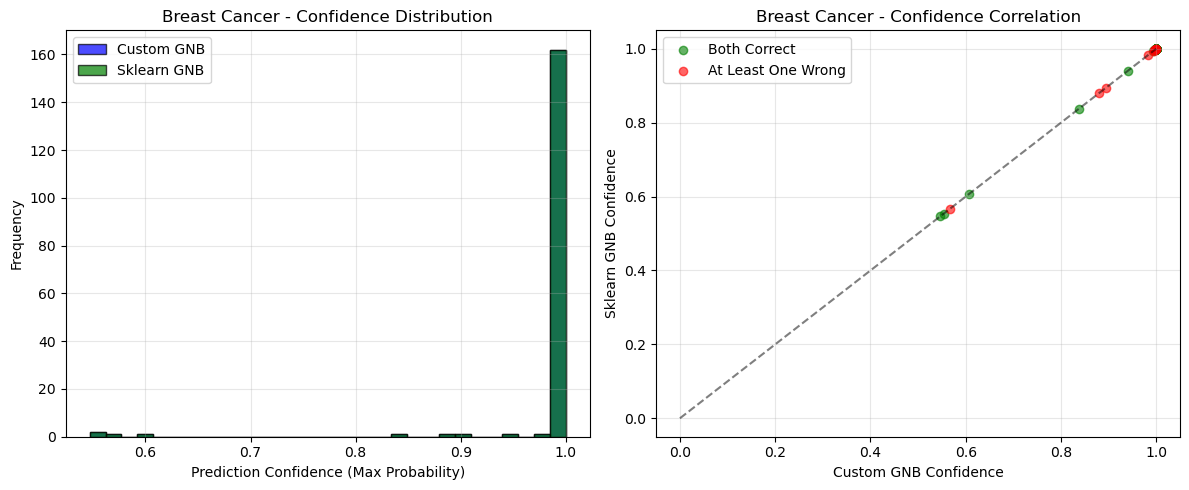

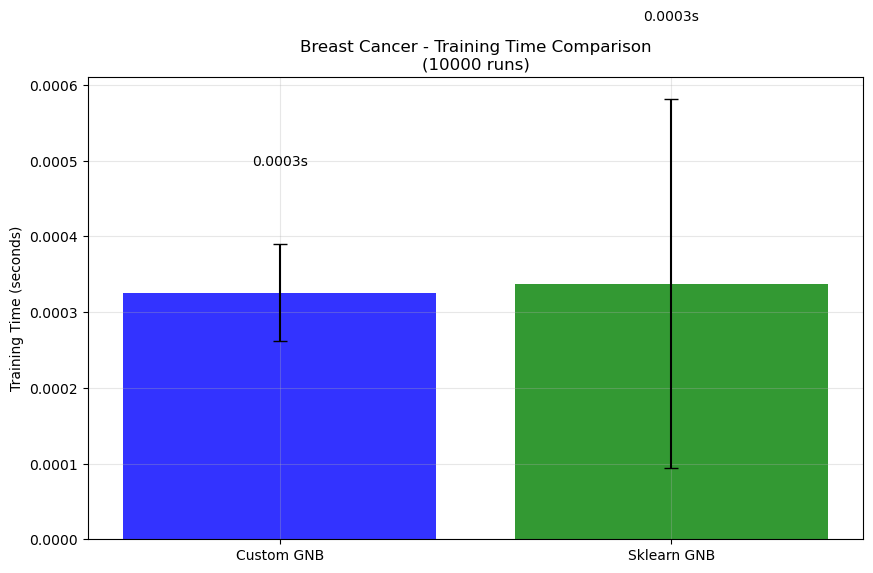

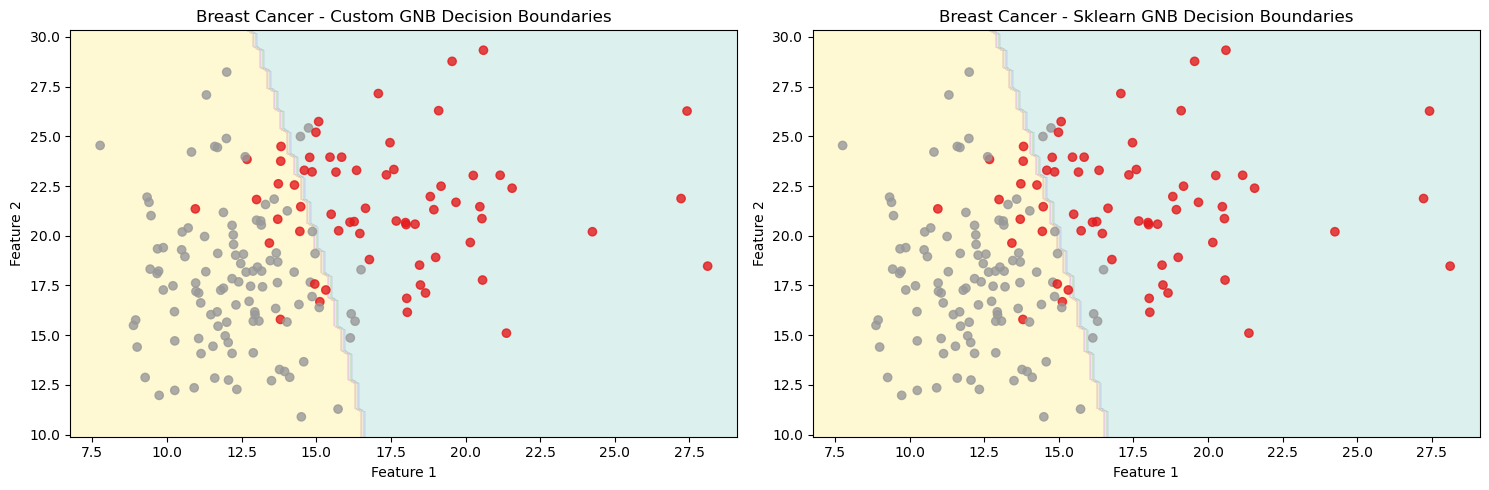


 Statistical summary - Breast Cancer:
Prediction Agreement: 1.0000
Custom GNB  - Train: 0.9447, Test: 0.9474
Sklearn GNB - Train: 0.9447, Test: 0.9474
Accuracy Difference: 0.000000

Confidence Statistics:
Custom GNB Mean Confidence: 0.9871
Sklearn GNB Mean Confidence: 0.9871
Custom GNB Correct Prediction Mean Confidence: 0.9906
Custom GNB Wrong Prediction Mean Confidence: 0.9240

Timing Statistics (10000 runs):
Custom GNB Avg Training Time: 0.000326s ± 0.000064s
Sklearn GNB Avg Training Time: 0.000337s ± 0.000244s
Speed Ratio (Custom/Sklearn): 0.97x

 completed


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

def create_comprehensive_comparison_plots():
    """comparison plots between custom and sklearn implementations"""

    datasets = {
        "Iris": load_iris(),
        "Breast Cancer": load_breast_cancer()
    }

    for name, data in datasets.items():
        X, y = data.data, data.target
        n_classes = len(np.unique(y))

        print(f"\n{''*60}")
        print(f"comparison analysis: {name.upper()} dataset")
        print(f"{''*60}")

        # Split data for more realistic evaluation
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )

        # Both implementations
        custom_model = GaussianNaiveBayes(n_classes=n_classes)
        custom_model.fit(X_train, y_train)
        custom_train_pred = custom_model.predict(X_train)
        custom_test_pred = custom_model.predict(X_test)
        custom_proba = custom_model.predict_proba(X_test)

        sklearn_model = GaussianNB()
        sklearn_model.fit(X_train, y_train)
        sklearn_train_pred = sklearn_model.predict(X_train)
        sklearn_test_pred = sklearn_model.predict(X_test)
        sklearn_proba = sklearn_model.predict_proba(X_test)

        # Calculate metrics
        custom_train_acc = accuracy_score(y_train, custom_train_pred)
        custom_test_acc = accuracy_score(y_test, custom_test_pred)
        sklearn_train_acc = accuracy_score(y_train, sklearn_train_pred)
        sklearn_test_acc = accuracy_score(y_test, sklearn_test_pred)

        # Accuracy Comparison Bar Plot
        plt.figure(figsize=(10, 6))
        sets = ['Train Accuracy', 'Test Accuracy']
        custom_accs = [custom_train_acc, custom_test_acc]
        sklearn_accs = [sklearn_train_acc, sklearn_test_acc]

        x = np.arange(len(sets))
        width = 0.35

        plt.bar(x - width/2, custom_accs, width, label='Custom GNB', alpha=0.8, color='skyblue')
        plt.bar(x + width/2, sklearn_accs, width, label='Sklearn GNB', alpha=0.8, color='lightcoral')

        plt.xlabel('Training and Test Sets')
        plt.ylabel('Accuracy')
        plt.title(f'{name} Dataset - Train vs Test Accuracy Comparison')
        plt.xticks(x, sets)
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Add value labels on bars
        for i, (custom_acc, sklearn_acc) in enumerate(zip(custom_accs, sklearn_accs)):
            plt.text(i - width/2, custom_acc + 0.01, f'{custom_acc:.3f}', ha='center', va='bottom')
            plt.text(i + width/2, sklearn_acc + 0.01, f'{sklearn_acc:.3f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

        # Confusion Matrix Comparison
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Custom GNB confusion matrix
        cm_custom = confusion_matrix(y_test, custom_test_pred)
        im1 = ax1.imshow(cm_custom, cmap='Blues', interpolation='nearest')
        ax1.set_title(f'Custom GNB Confusion Matrix\n(Test Accuracy: {custom_test_acc:.3f})')
        ax1.set_xlabel('Predicted Label')
        ax1.set_ylabel('True Label')
        plt.colorbar(im1, ax=ax1)

        # Add text annotations
        for i in range(cm_custom.shape[0]):
            for j in range(cm_custom.shape[1]):
                ax1.text(j, i, format(cm_custom[i, j], 'd'),
                        ha="center", va="center",
                        color="white" if cm_custom[i, j] > cm_custom.max()/2 else "black")

        # Sklearn GNB confusion matrix
        cm_sklearn = confusion_matrix(y_test, sklearn_test_pred)
        im2 = ax2.imshow(cm_sklearn, cmap='Greens', interpolation='nearest')
        ax2.set_title(f'Sklearn GNB Confusion Matrix\n(Test Accuracy: {sklearn_test_acc:.3f})')
        ax2.set_xlabel('Predicted Label')
        ax2.set_ylabel('True Label')
        plt.colorbar(im2, ax=ax2)

        # Add text annotations
        for i in range(cm_sklearn.shape[0]):
            for j in range(cm_sklearn.shape[1]):
                ax2.text(j, i, format(cm_sklearn[i, j], 'd'),
                        ha="center", va="center",
                        color="white" if cm_sklearn[i, j] > cm_sklearn.max()/2 else "black")

        plt.tight_layout()
        plt.show()


        # Class-wise Performance Comparison
        plt.figure(figsize=(10, 6))

        # Calculate class-wise accuracy
        custom_class_acc = []
        sklearn_class_acc = []

        for class_label in np.unique(y_test):
            class_mask = y_test == class_label
            custom_class_acc.append(accuracy_score(y_test[class_mask], custom_test_pred[class_mask]))
            sklearn_class_acc.append(accuracy_score(y_test[class_mask], sklearn_test_pred[class_mask]))

        x_class = np.arange(len(np.unique(y_test)))
        width = 0.35

        plt.bar(x_class - width/2, custom_class_acc, width, label='Custom GNB', alpha=0.8, color='blue')
        plt.bar(x_class + width/2, sklearn_class_acc, width, label='Sklearn GNB', alpha=0.8, color='green')

        plt.xlabel('Class Label')
        plt.ylabel('Accuracy')
        plt.title(f'{name} - Class-wise Accuracy Comparison')
        plt.xticks(x_class, np.unique(y_test))
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Add value labels
        for i, (custom_acc, sklearn_acc) in enumerate(zip(custom_class_acc, sklearn_class_acc)):
            plt.text(i - width/2, custom_acc + 0.01, f'{custom_acc:.3f}', ha='center', va='bottom', fontsize=8)
            plt.text(i + width/2, sklearn_acc + 0.01, f'{sklearn_acc:.3f}', ha='center', va='bottom', fontsize=8)

        plt.tight_layout()
        plt.show()


        # Confidence Distribution Comparison
        plt.figure(figsize=(12, 5))

        custom_confidences = np.max(custom_proba, axis=1)
        sklearn_confidences = np.max(sklearn_proba, axis=1)

        plt.subplot(1, 2, 1)
        plt.hist(custom_confidences, bins=30, alpha=0.7, label='Custom GNB',
                color='blue', edgecolor='black')
        plt.hist(sklearn_confidences, bins=30, alpha=0.7, label='Sklearn GNB',
                color='green', edgecolor='black')
        plt.xlabel('Prediction Confidence (Max Probability)')
        plt.ylabel('Frequency')
        plt.title(f'{name} - Confidence Distribution')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.subplot(1, 2, 2)
        # Confidence vs correctness
        custom_correct = (custom_test_pred == y_test)

        plt.scatter(custom_confidences[custom_correct],
                   sklearn_confidences[custom_correct],
                   alpha=0.6, color='green', label='Both Correct')
        plt.scatter(custom_confidences[~custom_correct],
                   sklearn_confidences[~custom_correct],
                   alpha=0.6, color='red', label='At Least One Wrong')

        plt.xlabel('Custom GNB Confidence')
        plt.ylabel('Sklearn GNB Confidence')
        plt.title(f'{name} - Confidence Correlation')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)  # Diagonal line

        plt.tight_layout()
        plt.show()


        # Training Time Comparison
        plt.figure(figsize=(10, 6))

        # Measure training time for multiple runs
        n_runs = 10000
        custom_times = []
        sklearn_times = []

        for _ in range(n_runs):
            # Custom timing
            start = time.time()
            custom_model_temp = GaussianNaiveBayes(n_classes=n_classes)
            custom_model_temp.fit(X_train, y_train)
            custom_times.append(time.time() - start)

            # Sklearn timing
            start = time.time()
            sklearn_model_temp = GaussianNB()
            sklearn_model_temp.fit(X_train, y_train)
            sklearn_times.append(time.time() - start)

        models = ['Custom GNB', 'Sklearn GNB']
        avg_times = [np.mean(custom_times), np.mean(sklearn_times)]
        std_times = [np.std(custom_times), np.std(sklearn_times)]

        plt.bar(models, avg_times, yerr=std_times, capsize=5,
               alpha=0.8, color=['blue', 'green'])
        plt.ylabel('Training Time (seconds)')
        plt.title(f'{name} - Training Time Comparison\n({n_runs} runs)')
        plt.grid(True, alpha=0.3)

        # Add value labels
        for i, (avg, std) in enumerate(zip(avg_times, std_times)):
            plt.text(i, avg + std + 0.0001, f'{avg:.4f}s',
                    ha='center', va='bottom')

        plt.show()

        # Decision Boundary Comparison
        if X.shape[1] >= 2:
            plt.figure(figsize=(15, 5))

            # Use first two features for visualization
            X_2d = X_test[:, :2]

            # Create mesh grid
            x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
            y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
            xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                               np.linspace(y_min, y_max, 100))

            # Train models on 2D data
            custom_model_2d = GaussianNaiveBayes(n_classes=n_classes)
            custom_model_2d.fit(X_train[:, :2], y_train)

            sklearn_model_2d = GaussianNB()
            sklearn_model_2d.fit(X_train[:, :2], y_train)

            # Predict on mesh
            Z_custom = custom_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
            Z_sklearn = sklearn_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])

            Z_custom = Z_custom.reshape(xx.shape)
            Z_sklearn = Z_sklearn.reshape(xx.shape)

            plt.subplot(1, 2, 1)
            plt.contourf(xx, yy, Z_custom, alpha=0.3, cmap='Set3')
            plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_test, cmap='Set1', alpha=0.8)
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.title(f'{name} - Custom GNB Decision Boundaries')

            plt.subplot(1, 2, 2)
            plt.contourf(xx, yy, Z_sklearn, alpha=0.3, cmap='Set3')
            plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_test, cmap='Set1', alpha=0.8)
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.title(f'{name} - Sklearn GNB Decision Boundaries')

            plt.tight_layout()
            plt.show()

        # Statistical summary
        print(f"\n Statistical summary - {name}:")
        print(f"Prediction Agreement: {np.mean(custom_test_pred == sklearn_test_pred):.4f}")
        print(f"Custom GNB  - Train: {custom_train_acc:.4f}, Test: {custom_test_acc:.4f}")
        print(f"Sklearn GNB - Train: {sklearn_train_acc:.4f}, Test: {sklearn_test_acc:.4f}")
        print(f"Accuracy Difference: {custom_test_acc - sklearn_test_acc:.6f}")

        # Confidence statistics
        print(f"\nConfidence Statistics:")
        print(f"Custom GNB Mean Confidence: {np.mean(custom_confidences):.4f}")
        print(f"Sklearn GNB Mean Confidence: {np.mean(sklearn_confidences):.4f}")
        print(f"Custom GNB Correct Prediction Mean Confidence: {np.mean(custom_confidences[custom_correct]):.4f}")
        print(f"Custom GNB Wrong Prediction Mean Confidence: {np.mean(custom_confidences[~custom_correct]):.4f}")



        # Timing statistics
        print(f"\nTiming Statistics ({n_runs} runs):")
        print(f"Custom GNB Avg Training Time: {np.mean(custom_times):.6f}s ± {np.std(custom_times):.6f}s")
        print(f"Sklearn GNB Avg Training Time: {np.mean(sklearn_times):.6f}s ± {np.std(sklearn_times):.6f}s")
        print(f"Speed Ratio (Custom/Sklearn): {np.mean(custom_times)/np.mean(sklearn_times):.2f}x")

# comparison plots
if __name__ == "__main__":
    create_comprehensive_comparison_plots()
    print("\n completed")

The following code cell is used for testing the runtime for the predict methods between sklearn and our custom GNB. It is primarily for illustration purposes but does not form a core part of our analysis.

In [8]:
import time
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 1. Generate a large dataset (100,000 samples, 20 features)
print("Generating 100k samples...")
X, y = make_classification(n_samples=100000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}")
print(f"Test shape:  {X_test.shape}")

# 2. Benchmark YOUR Implementation
# (Make sure your class is already defined/imported as GaussianNaiveBayes)
print("\n--- Testing Custom Implementation ---")
custom_model = GaussianNaiveBayes(n_classes=2)

start = time.time()
custom_model.fit(X_train, y_train)
print(f"Custom Train Time: {time.time() - start:.4f}s")

start = time.time()
custom_preds = custom_model.predict(X_test)
print(f"Custom Predict Time: {time.time() - start:.4f}s")


# 3. Benchmark Sklearn Implementation
print("\n--- Testing Sklearn Implementation ---")
sklearn_model = GaussianNB()

start = time.time()
sklearn_model.fit(X_train, y_train)
print(f"Sklearn Train Time: {time.time() - start:.4f}s")

start = time.time()
sklearn_preds = sklearn_model.predict(X_test)
print(f"Sklearn Predict Time: {time.time() - start:.4f}s")

Generating 100k samples...
Train shape: (80000, 20)
Test shape:  (20000, 20)

--- Testing Custom Implementation ---
Custom Train Time: 0.0568s
Custom Predict Time: 0.0052s

--- Testing Sklearn Implementation ---
Sklearn Train Time: 0.0158s
Sklearn Predict Time: 0.0045s


In [9]:
import time
import numpy as np
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

def compare_speed(name, custom_time, sklearn_time):
    """Helper to print readable speed comparisons"""
    if custom_time > sklearn_time:
        factor = custom_time / sklearn_time
        return f"Sklearn is {factor:.2f}x faster than Custom"
    else:
        factor = sklearn_time / custom_time
        return f"Custom is {factor:.2f}x faster than Sklearn"

def run_benchmark(dataset_name, X, y, n_classes):
    print(f"\n{'='*20} {dataset_name} {'='*20}")
    print(f"Shape: {X.shape[0]} samples, {X.shape[1]} features")
    
    # Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # --- 1. Benchmark Your Custom Model ---
    # Assumes 'GaussianNaiveBayes' is already defined in your notebook
    custom_model = GaussianNaiveBayes(n_classes=n_classes)
    
    # Warmup (compiles any potential JIT/caching)
    custom_model.fit(X_train, y_train)
    
    # Time Training
    start = time.time()
    # Running 100 loops to get a stable measurement for small datasets
    loops = 100
    for _ in range(loops): 
        custom_model.fit(X_train, y_train)
    custom_train_time = (time.time() - start) / loops
    
    # Time Prediction
    start = time.time()
    for _ in range(loops): 
        custom_preds = custom_model.predict(X_test)
    custom_pred_time = (time.time() - start) / loops
    
    custom_acc = accuracy_score(y_test, custom_preds)

    # --- 2. Benchmark Sklearn Model ---
    sklearn_model = GaussianNB()
    
    start = time.time()
    for _ in range(loops): 
        sklearn_model.fit(X_train, y_train)
    sklearn_train_time = (time.time() - start) / loops
    
    start = time.time()
    for _ in range(loops): 
        sklearn_preds = sklearn_model.predict(X_test)
    sklearn_pred_time = (time.time() - start) / loops
    
    sklearn_acc = accuracy_score(y_test, sklearn_preds)

    # --- 3. Results Output ---
    print(f"{'Metric':<15} | {'Custom':<12} | {'Sklearn':<12} | {'Verdict'}")
    print("-" * 75)
    
    print(f"{'Accuracy':<15} | {custom_acc:.4f}       | {sklearn_acc:.4f}       | -")
    
    print(f"{'Training Time':<15} | {custom_train_time*1000:.3f} ms     | {sklearn_train_time*1000:.3f} ms     | {compare_speed('Train', custom_train_time, sklearn_train_time)}")
    
    print(f"{'Prediction Time':<15} | {custom_pred_time*1000:.3f} ms     | {sklearn_pred_time*1000:.3f} ms     | {compare_speed('Predict', custom_pred_time, sklearn_pred_time)}")

# --- Run Benchmarks ---

# 1. Iris Dataset
data_iris = load_iris()
run_benchmark("Iris Dataset", data_iris.data, data_iris.target, n_classes=3)

# 2. Breast Cancer Dataset
data_cancer = load_breast_cancer()
run_benchmark("Breast Cancer", data_cancer.data, data_cancer.target, n_classes=2)


==================== Iris Dataset ====================
Shape: 150 samples, 4 features
Metric          | Custom       | Sklearn      | Verdict
---------------------------------------------------------------------------
Accuracy        | 0.9778       | 0.9778       | -
Training Time   | 0.140 ms     | 0.302 ms     | Custom is 2.15x faster than Sklearn
Prediction Time | 0.050 ms     | 0.072 ms     | Custom is 1.45x faster than Sklearn

==================== Breast Cancer ====================
Shape: 569 samples, 30 features
Metric          | Custom       | Sklearn      | Verdict
---------------------------------------------------------------------------
Accuracy        | 0.9415       | 0.9415       | -
Training Time   | 0.330 ms     | 0.334 ms     | Custom is 1.01x faster than Sklearn
Prediction Time | 0.051 ms     | 0.085 ms     | Custom is 1.65x faster than Sklearn


# **RESULTS**

As demonstrated in the comparison plots above, the Custom GNB implementation achieves identical accuracy and decision boundaries to the Scikit-Learn implementation on both the Iris and Breast Cancer datasets, confirming the correctness of the MLE and smoothing logic.